<a href="https://colab.research.google.com/github/Arif24434/Data-Science-Project-Employee-Turnover-Analysis-/blob/main/HR_Employee_Turnover_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE
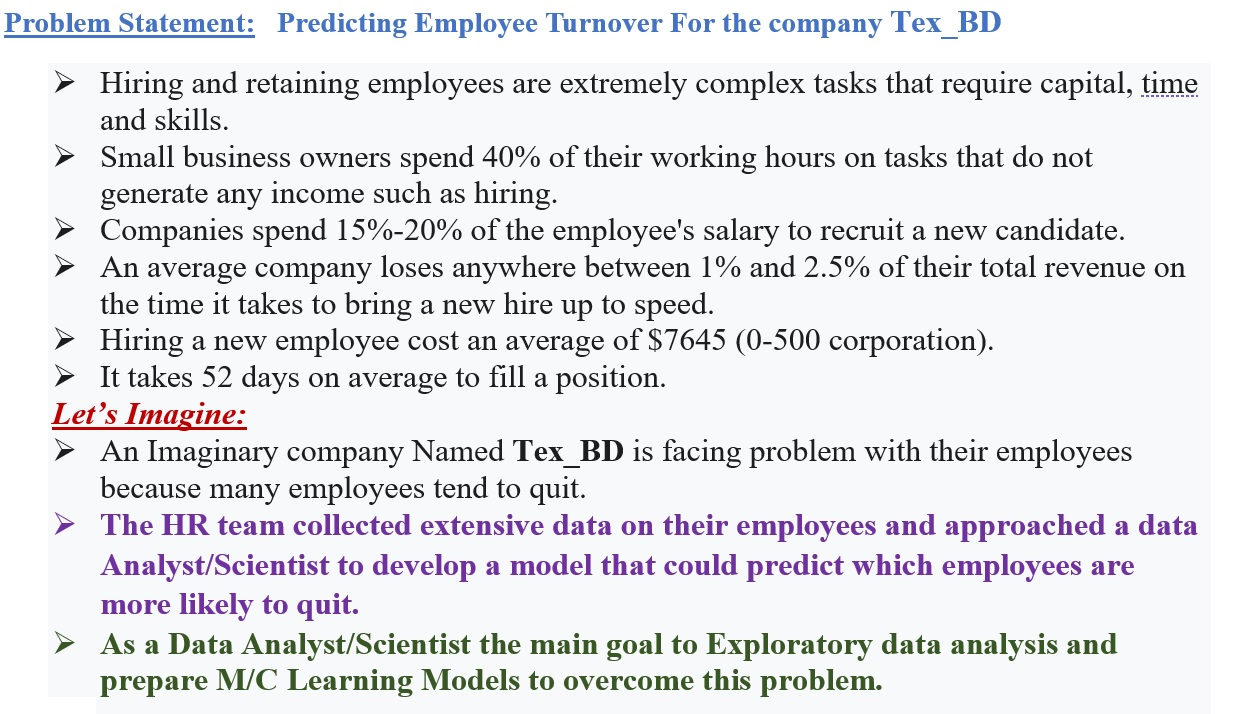

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd   #for data manipulation and analysis
import numpy as np    #for numerical operations
import seaborn as sns   #for data visualization
import matplotlib.pyplot as plt     #for data visualization as well

In [ ]:
# I have to include the full link to the csv file containing my dataset from google drive.
df = pd.read_csv('/content/drive/MyDrive/@€@/Data Analysis projects/Employee Turnover HR Analytics/AEA.csv')
df.info() # to have the information of the data set at once. It looks 43 features in total, each contains 1737 data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JobLevel                      1738 non-null   int64  
 1   Age                           1738 non-null   int64  
 2   JobLevel.1                    1738 non-null   int64  
 3   JobRole                       1738 non-null   object 
 4   MonthlyIncome                 1738 non-null   int64  
 5   JobLevel.2                    1738 non-null   int64  
 6   MonthlyRate                   1738 non-null   int64  
 7   EducationField                1738 non-null   object 
 8   Unnamed: 8                    0 non-null      float64
 9   Gender                        1738 non-null   object 
 10  EnvironmentSatisfaction       1738 non-null   int64  
 11  Unnamed: 11                   0 non-null      float64
 12  JobInvolvement                1738 non-null   int64  
 13  Hou

In [ ]:
pd.set_option('display.max_columns',None) # it is used so it will display all columns even the dataset is big.
df.head(5) # it is a method that will read first (5 raw x column)

,JobLevel,Age,JobLevel.1,JobRole,MonthlyIncome,JobLevel.2,MonthlyRate,EducationField,Unnamed: 8,Gender,EnvironmentSatisfaction,Unnamed: 11,JobInvolvement,HourlyRate,Education,DailyRate,BusinessTravel,Unnamed: 17,Attrition,Department,DistanceFromHome,Unnamed: 21,MaritalStatus,EmployeeNumber,EmployeeCount,JobSatisfaction,NumCompaniesWorked,Over18,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Work_accident,Working with current manager,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
0,2,41,2,Sales Executive,5993,2,19479,Life Sciences,NaN,Female,2,NaN,3,94,2,1102,Travel_Rarely,NaN,Yes,Sales,1,NaN,Single,1.0,1.0,4,8,Y,6,4,0.0,5.0,0.0,5.0,Yes,11.0,3.0,1,80.0,0,8,0.0,1
1,2,49,2,Research Scientist,5130,2,24907,Life Sciences,NaN,Male,3,NaN,2,61,1,279,Travel_Frequently,NaN,No,Research & Development,8,NaN,Married,2.0,1.0,2,1,Y,10,7,1.0,7.0,0.0,10.0,No,23.0,4.0,4,80.0,1,10,3.0,3
2,1,37,1,Laboratory Technician,2090,1,2396,Other,NaN,Male,4,NaN,2,92,2,1373,Travel_Rarely,NaN,Yes,Research & Development,2,NaN,Single,4.0,1.0,3,6,Y,0,0,0.0,0.0,NaN,4.0,Yes,15.0,3.0,2,80.0,0,7,3.0,3
3,1,33,1,Research Scientist,2909,1,23159,Life Sciences,NaN,Female,4,NaN,3,56,4,1392,Travel_Frequently,NaN,No,Research & Development,3,NaN,Married,5.0,1.0,3,1,Y,8,7,3.0,0.0,0.0,5.0,Yes,11.0,3.0,3,80.0,0,8,3.0,3
4,1,27,1,Laboratory Technician,3468,1,16632,Medical,NaN,Male,1,NaN,3,40,1,591,Travel_Rarely,NaN,No,Research & Development,2,NaN,Married,7.0,1.0,2,9,Y,2,2,2.0,2.0,0.0,10.0,No,12.0,3.0,4,80.0,1,6,3.0,3


In [ ]:
df.tail(5) # (last 5 raw x column of data set)

,JobLevel,Age,JobLevel.1,JobRole,MonthlyIncome,JobLevel.2,MonthlyRate,EducationField,Unnamed: 8,Gender,EnvironmentSatisfaction,Unnamed: 11,JobInvolvement,HourlyRate,Education,DailyRate,BusinessTravel,Unnamed: 17,Attrition,Department,DistanceFromHome,Unnamed: 21,MaritalStatus,EmployeeNumber,EmployeeCount,JobSatisfaction,NumCompaniesWorked,Over18,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Work_accident,Working with current manager,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
1733,2,36,2,Laboratory Technician,2571,2,12290,Medical,NaN,Male,3,NaN,4,41,2,884,Travel_Frequently,NaN,No,Research & Development,23,NaN,Married,2061.0,1.0,4,4,Y,5,2,0.0,3.0,NaN,3.0,No,17.0,3.0,3,80.0,1,17,3.0,3
1734,3,39,3,Healthcare Representative,9991,3,21457,Medical,NaN,Male,4,NaN,2,42,1,613,Travel_Rarely,NaN,No,Research & Development,6,NaN,Married,2062.0,1.0,1,4,Y,7,7,1.0,7.0,NaN,0.5,No,15.0,3.0,1,80.0,1,9,5.0,3
1735,2,27,2,Manufacturing Director,6142,2,5174,Life Sciences,NaN,Male,2,NaN,4,87,3,155,Travel_Rarely,NaN,No,Research & Development,4,NaN,Married,2064.0,1.0,2,1,Y,6,2,0.0,3.0,NaN,6.0,Yes,20.0,4.0,2,80.0,1,6,0.0,3
1736,2,49,2,Sales Executive,5390,2,13243,Medical,NaN,Male,4,NaN,2,63,3,1023,Travel_Frequently,NaN,No,Sales,2,NaN,Married,2065.0,1.0,2,2,Y,9,6,0.0,8.0,NaN,5.0,No,14.0,3.0,4,80.0,0,17,3.0,2
1737,2,34,2,Laboratory Technician,4404,2,10228,Medical,NaN,Male,2,NaN,4,82,3,628,Travel_Rarely,NaN,No,Research & Development,8,NaN,Married,2068.0,1.0,3,2,Y,4,3,1.0,2.0,NaN,2.0,No,12.0,3.0,1,80.0,0,6,3.0,4


In [ ]:
## Now I am checking all the important parameters of a Dataset at a Glance, Like mean, STD, max and Quartiles
df.describe() # it is the method that describes all the important parameters of a Dataset at a Glance, Like mean, STD, max and Quartiles

,JobLevel,Age,JobLevel.1,MonthlyIncome,JobLevel.2,MonthlyRate,Unnamed: 8,EnvironmentSatisfaction,Unnamed: 11,JobInvolvement,HourlyRate,Education,DailyRate,Unnamed: 17,DistanceFromHome,Unnamed: 21,EmployeeNumber,EmployeeCount,JobSatisfaction,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Work_accident,Working with current manager,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
count,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,0.0,1738.000000,0.0,1738.000000,1738.000000,1738.000000,1738.000000,0.0,1738.000000,0.0,1737.000000,1737.0,1738.000000,1738.000000,1738.000000,1738.000000,1737.000000,1737.000000,1043.000000,1737.000000,1737.000000,1736.000000,1738.000000,1737.0,1738.000000,1738.000000,1736.000000,1738.000000
mean,2.045455,36.880322,2.045455,6426.733602,2.045455,14265.221519,NaN,2.724396,NaN,2.724396,66.138090,2.918872,799.965478,NaN,9.255466,NaN,1156.880253,1.0,2.729574,2.698504,6.956847,4.212888,2.174439,4.118595,0.048897,4.505181,15.227979,3.156106,2.710587,80.0,0.807250,11.184695,2.807028,2.761795
std,1.091499,9.038812,1.091499,4631.201207,1.091499,7129.061119,NaN,1.092968,NaN,0.717808,20.334407,1.015017,403.116363,NaN,8.111577,NaN,634.548286,0.0,1.100819,2.494440,6.003346,3.635622,3.203014,3.547210,0.215757,2.581054,3.658816,0.363060,1.072347,0.0,0.857903,7.626715,1.284883,0.704204
min,1.000000,18.000000,1.000000,1009.000000,1.000000,2094.000000,NaN,1.000000,NaN,1.000000,30.000000,1.000000,102.000000,NaN,1.000000,NaN,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000
25%,1.000000,30.000000,1.000000,2909.500000,1.000000,8001.000000,NaN,2.000000,NaN,2.000000,48.000000,2.000000,464.000000,NaN,2.000000,NaN,582.000000,1.0,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000,0.000000,2.500000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000
50%,2.000000,36.000000,2.000000,4930.000000,2.000000,14174.000000,NaN,3.000000,NaN,3.000000,66.000000,3.000000,793.000000,NaN,7.000000,NaN,1217.000000,1.0,3.000000,2.000000,5.000000,3.000000,1.000000,3.000000,0.000000,4.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000
75%,3.000000,43.000000,3.000000,8150.750000,3.000000,20365.500000,NaN,4.000000,NaN,3.000000,84.000000,4.000000,1157.750000,NaN,14.000000,NaN,1755.000000,1.0,4.000000,4.000000,9.000000,7.000000,3.000000,7.000000,0.000000,6.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000
max,5.000000,60.000000,5.000000,19999.000000,5.000000,26999.000000,NaN,4.000000,NaN,4.000000,100.000000,5.000000,1499.000000,NaN,29.000000,NaN,2068.000000,1.0,4.000000,9.000000,40.000000,18.000000,15.000000,17.000000,1.000000,10.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000


# TASK #3: VISUALIZE DATASET

In [ ]:
# Let's replace 'Attritition' , 'OverTime' , 'Over18' column with integers before performing any visualizations
df['Attrition']= df['Attrition'].apply(lambda x:1 if x=='Yes' else 0) # here I used Lambda function to convert Attrition text to 0 and 1 number
df['OverTime']= df['OverTime'].apply(lambda x:1 if x=='Yes' else 0) # here I used Lambda function to convert OverTime text to 0 and 1 number
df['Over18']= df['Attrition'].apply(lambda x:1 if x=='Y' else 0) # here I used Lambda function to convert Over18 text to 0 and 1 number
df.head(5) # to display the first 5 row x Columns of the dataset after change

,JobLevel,Age,JobLevel.1,JobRole,MonthlyIncome,JobLevel.2,MonthlyRate,EducationField,Unnamed: 8,Gender,EnvironmentSatisfaction,Unnamed: 11,JobInvolvement,HourlyRate,Education,DailyRate,BusinessTravel,Unnamed: 17,Attrition,Department,DistanceFromHome,Unnamed: 21,MaritalStatus,EmployeeNumber,EmployeeCount,JobSatisfaction,NumCompaniesWorked,Over18,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Work_accident,Working with current manager,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
0,2,41,2,Sales Executive,5993,2,19479,Life Sciences,NaN,Female,2,NaN,3,94,2,1102,Travel_Rarely,NaN,1,Sales,1,NaN,Single,1.0,1.0,4,8,0,6,4,0.0,5.0,0.0,5.0,1,11.0,3.0,1,80.0,0,8,0.0,1
1,2,49,2,Research Scientist,5130,2,24907,Life Sciences,NaN,Male,3,NaN,2,61,1,279,Travel_Frequently,NaN,0,Research & Development,8,NaN,Married,2.0,1.0,2,1,0,10,7,1.0,7.0,0.0,10.0,0,23.0,4.0,4,80.0,1,10,3.0,3
2,1,37,1,Laboratory Technician,2090,1,2396,Other,NaN,Male,4,NaN,2,92,2,1373,Travel_Rarely,NaN,1,Research & Development,2,NaN,Single,4.0,1.0,3,6,0,0,0,0.0,0.0,NaN,4.0,1,15.0,3.0,2,80.0,0,7,3.0,3
3,1,33,1,Research Scientist,2909,1,23159,Life Sciences,NaN,Female,4,NaN,3,56,4,1392,Travel_Frequently,NaN,0,Research & Development,3,NaN,Married,5.0,1.0,3,1,0,8,7,3.0,0.0,0.0,5.0,1,11.0,3.0,3,80.0,0,8,3.0,3
4,1,27,1,Laboratory Technician,3468,1,16632,Medical,NaN,Male,1,NaN,3,40,1,591,Travel_Rarely,NaN,0,Research & Development,2,NaN,Married,7.0,1.0,2,9,0,2,2,2.0,2.0,0.0,10.0,0,12.0,3.0,4,80.0,1,6,3.0,3


<Axes: >

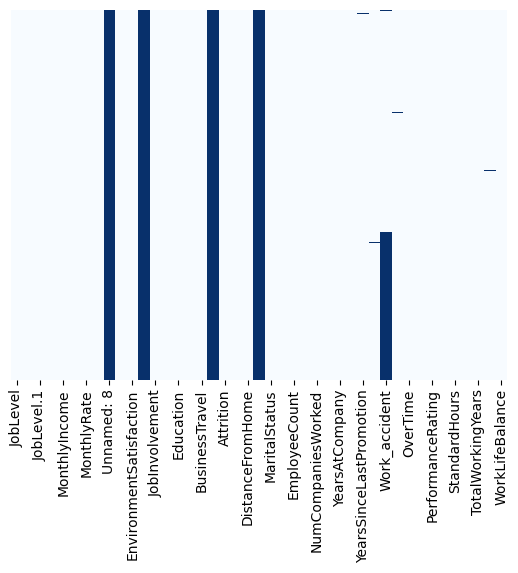

In [ ]:
# Let's see if we have any missing data, luckily we don't!. # sns = seaborn library, method isnull() yticlebel = false because i donot want any label at y axis,
# cbar = False because I want to eliminate colorbar at side in heat map.
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='Blues')

In [ ]:
# it seems we have some missing data even missing colum so, i want to investigate it more clearly.  isnull() method i used this function to get more clear result to find null values.
df.isnull().any()


JobLevel                        False
Age                             False
JobLevel.1                      False
JobRole                         False
MonthlyIncome                   False
JobLevel.2                      False
MonthlyRate                     False
EducationField                  False
Unnamed: 8                       True
Gender                          False
EnvironmentSatisfaction         False
Unnamed: 11                      True
JobInvolvement                  False
HourlyRate                      False
Education                       False
DailyRate                       False
BusinessTravel                  False
Unnamed: 17                      True
Attrition                       False
Department                      False
DistanceFromHome                False
Unnamed: 21                      True
MaritalStatus                   False
EmployeeNumber                   True
EmployeeCount                    True
JobSatisfaction                 False
NumCompanies

In [ ]:
 # then I used print(is.null())  to print them as column
print (df.isnull())

      JobLevel    Age  JobLevel.1  JobRole  MonthlyIncome  JobLevel.2  \
0        False  False       False    False          False       False   
1        False  False       False    False          False       False   
2        False  False       False    False          False       False   
3        False  False       False    False          False       False   
4        False  False       False    False          False       False   
...        ...    ...         ...      ...            ...         ...   
1733     False  False       False    False          False       False   
1734     False  False       False    False          False       False   
1735     False  False       False    False          False       False   
1736     False  False       False    False          False       False   
1737     False  False       False    False          False       False   

      MonthlyRate  EducationField  Unnamed: 8  Gender  \
0           False           False        True   False   
1        

In [ ]:
# It seems some column has no value but only placed in dataset so, I want to drop them first.
print (df.columns) # it seems Unnamed: 8','Unnamed: 11','Unnamed: 17','Unnamed: 21 these are the columns


Index(['JobLevel', 'Age', 'JobLevel.1', 'JobRole', 'MonthlyIncome',
       'JobLevel.2', 'MonthlyRate', 'EducationField', 'Unnamed: 8', 'Gender',
       'EnvironmentSatisfaction', 'Unnamed: 11', 'JobInvolvement',
       'HourlyRate', 'Education', 'DailyRate', 'BusinessTravel', 'Unnamed: 17',
       'Attrition', 'Department', 'DistanceFromHome', 'Unnamed: 21',
       'MaritalStatus', 'EmployeeNumber', 'EmployeeCount', 'JobSatisfaction',
       'NumCompaniesWorked', 'Over18', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Work_accident',
       'Working with current manager', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance'],
      dtype='object')


In [ ]:
df.drop(['Unnamed: 8','Unnamed: 11','Unnamed: 17','Unnamed: 21'],axis=1,inplace=True) # this function df.drop () used to drop those collumns
print (df)

      JobLevel  Age  JobLevel.1                    JobRole  MonthlyIncome  \
0            2   41           2            Sales Executive           5993   
1            2   49           2         Research Scientist           5130   
2            1   37           1      Laboratory Technician           2090   
3            1   33           1         Research Scientist           2909   
4            1   27           1      Laboratory Technician           3468   
...        ...  ...         ...                        ...            ...   
1733         2   36           2      Laboratory Technician           2571   
1734         3   39           3  Healthcare Representative           9991   
1735         2   27           2     Manufacturing Director           6142   
1736         2   49           2            Sales Executive           5390   
1737         2   34           2      Laboratory Technician           4404   

      JobLevel.2  MonthlyRate EducationField  Gender  EnvironmentSatisfacti

In [ ]:
df.isnull().sum() # I have used this functionmethod isnull() and sum() to calculate and sum the whole null value from our Dataset

JobLevel                          0
Age                               0
JobLevel.1                        0
JobRole                           0
MonthlyIncome                     0
JobLevel.2                        0
MonthlyRate                       0
EducationField                    0
Gender                            0
EnvironmentSatisfaction           0
JobInvolvement                    0
HourlyRate                        0
Education                         0
DailyRate                         0
BusinessTravel                    0
Attrition                         0
Department                        0
DistanceFromHome                  0
MaritalStatus                     0
EmployeeNumber                    1
EmployeeCount                     1
JobSatisfaction                   0
NumCompaniesWorked                0
Over18                            0
YearsAtCompany                    0
YearsInCurrentRole                0
YearsSinceLastPromotion           1
YearsWithCurrManager        

In [ ]:
df.dropna(inplace=True)  # This is used to drop all null values
print(df.isnull().sum())

JobLevel                        0
Age                             0
JobLevel.1                      0
JobRole                         0
MonthlyIncome                   0
JobLevel.2                      0
MonthlyRate                     0
EducationField                  0
Gender                          0
EnvironmentSatisfaction         0
JobInvolvement                  0
HourlyRate                      0
Education                       0
DailyRate                       0
BusinessTravel                  0
Attrition                       0
Department                      0
DistanceFromHome                0
MaritalStatus                   0
EmployeeNumber                  0
EmployeeCount                   0
JobSatisfaction                 0
NumCompaniesWorked              0
Over18                          0
YearsAtCompany                  0
YearsInCurrentRole              0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Work_accident                   0
Working with c

In [ ]:
# it seems that there may be some duplicated column.
duplicated_columns= df.columns[df.columns.duplicated()] # it is used to check present the duplicated columns
print (duplicated_columns)

Index([], dtype='object')


In [ ]:
# For Object dtype, Duplicated are not present now I checked the duplicated colums for dtype=int64 i used this function.
duplicated_columns = []
seen_columns = set()
for column in df.columns:
    if df[column].dtype == 'int64' and column in seen_columns:
        duplicated_columns.append(column)
    else:
        seen_columns.add(column)
print(duplicated_columns)

[]


In [ ]:
# It seems logically there no duplicated columns for dtype=object and dtype= integer but if we look carefully column [job level,job level 1, job level 2] they are
#same to each other and thats why I need to drop job level 1 and job level 2] and keep [job level] only
df = df.drop(['JobLevel.1','JobLevel.2'],axis=1)
print(df)

      JobLevel  Age                    JobRole  MonthlyIncome  MonthlyRate  \
0            2   41            Sales Executive           5993        19479   
1            2   49         Research Scientist           5130        24907   
3            1   33         Research Scientist           2909        23159   
4            1   27      Laboratory Technician           3468        16632   
5            1   32      Laboratory Technician           3068        11864   
...        ...  ...                        ...            ...          ...   
1041         2   28            Sales Executive           8463        23490   
1042         1   44      Laboratory Technician           3162         7973   
1043         4   53          Research Director          16598        19764   
1044         2   49  Healthcare Representative           6651        21534   
1045         1   40         Research Scientist           2345         8045   

        EducationField  Gender  EnvironmentSatisfaction  JobInv

In [ ]:
df.dropna(inplace=True)  # This is used to drop and check all null values and duplicated columns once again and it seems they are cleaned now.
print(df.isnull().sum())

JobLevel                        0
Age                             0
JobRole                         0
MonthlyIncome                   0
MonthlyRate                     0
EducationField                  0
Gender                          0
EnvironmentSatisfaction         0
JobInvolvement                  0
HourlyRate                      0
Education                       0
DailyRate                       0
BusinessTravel                  0
Attrition                       0
Department                      0
DistanceFromHome                0
MaritalStatus                   0
EmployeeNumber                  0
EmployeeCount                   0
JobSatisfaction                 0
NumCompaniesWorked              0
Over18                          0
YearsAtCompany                  0
YearsInCurrentRole              0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Work_accident                   0
Working with current manager    0
OverTime                        0
PercentSalaryH

array([[<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'EmployeeNumber'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'YearsInCurrentRole'}>],
       [<Axes: title={'center': 'YearsSinceLastPromotion'}>,
        <Axes: title={'center

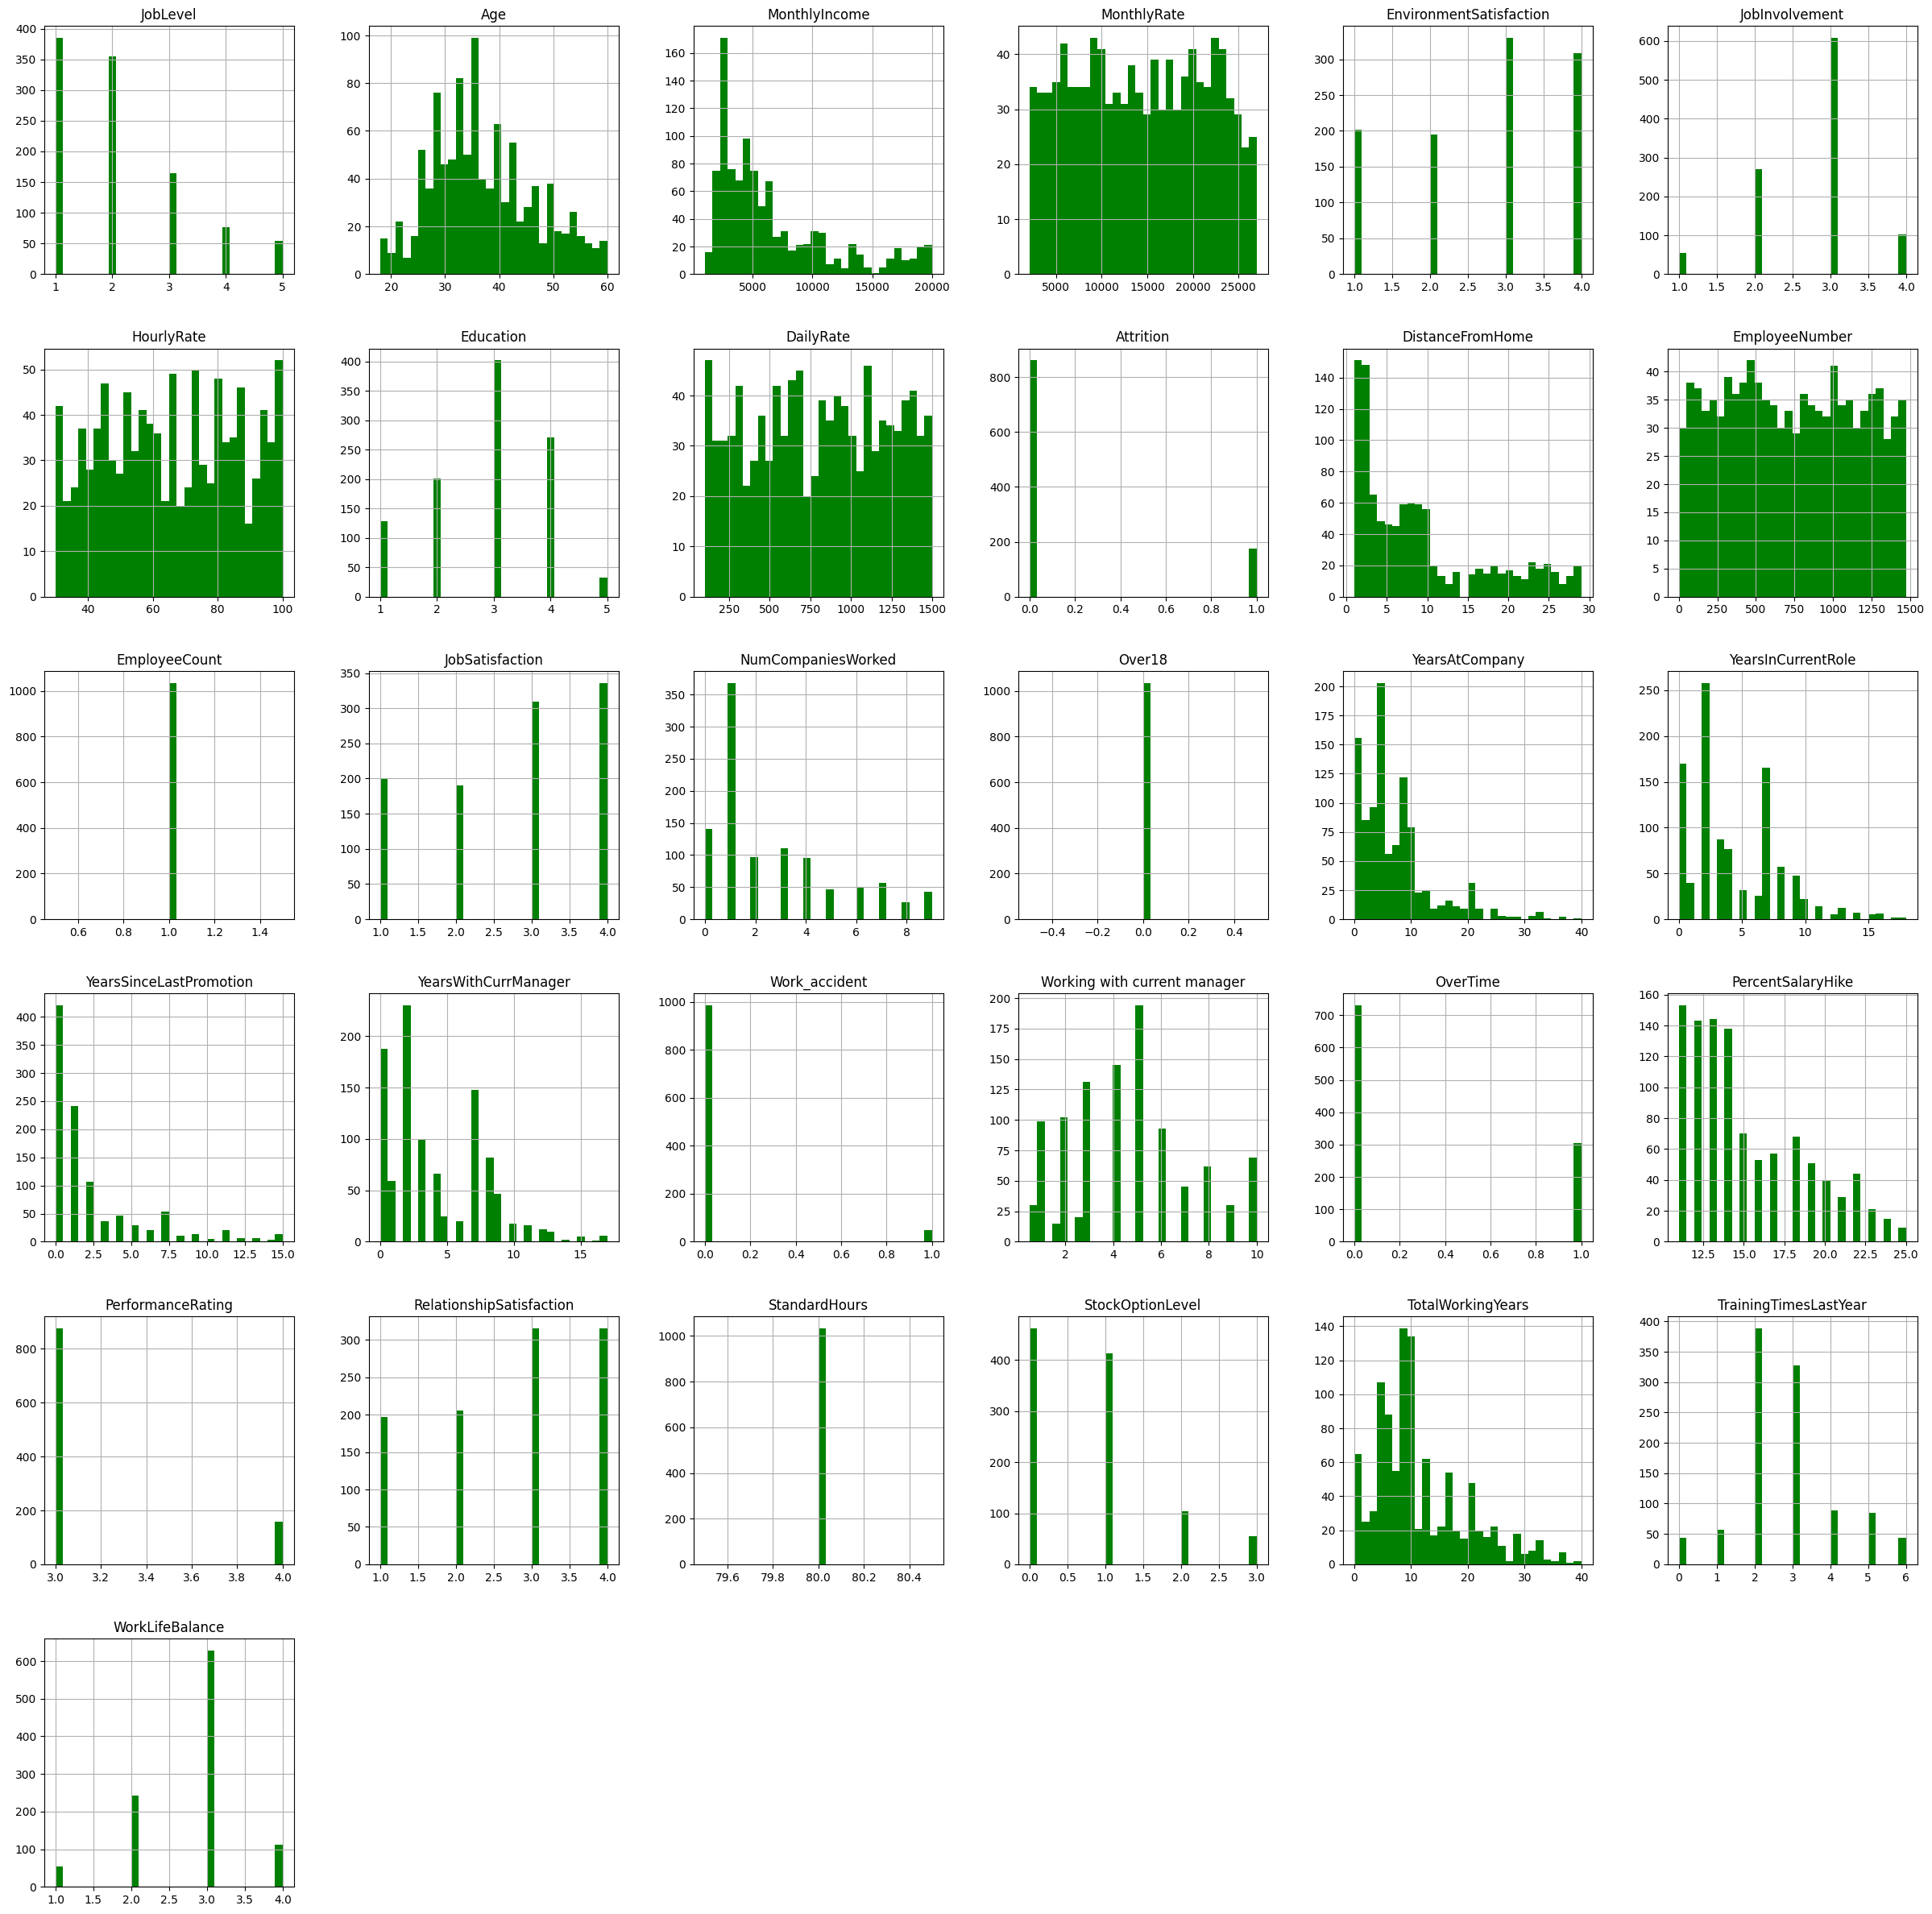

In [ ]:
# now I drawd a histogram to see the over all situation of the data orientation of the data set
df.hist(bins=30, figsize = (30,30), color ='g')

In [ ]:
# Quick Findings:
# From attretation histogram it can be said that many people wants to stay in this company around 75 -80 %
# Lots of people are in high education and most of employee stays inlower salary zone,
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other
# Most of the employees have working years between 5- 12 years.


In [ ]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)
df

,JobLevel,Age,JobRole,MonthlyIncome,MonthlyRate,EducationField,Gender,EnvironmentSatisfaction,JobInvolvement,HourlyRate,Education,DailyRate,BusinessTravel,Attrition,Department,DistanceFromHome,MaritalStatus,JobSatisfaction,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Work_accident,Working with current manager,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
0,2,41,Sales Executive,5993,19479,Life Sciences,Female,2,3,94,2,1102,Travel_Rarely,1,Sales,1,Single,4,8,6,4,0.0,5.0,0.0,5.0,1,11.0,3.0,1,0,8,0.0,1
1,2,49,Research Scientist,5130,24907,Life Sciences,Male,3,2,61,1,279,Travel_Frequently,0,Research & Development,8,Married,2,1,10,7,1.0,7.0,0.0,10.0,0,23.0,4.0,4,1,10,3.0,3
3,1,33,Research Scientist,2909,23159,Life Sciences,Female,4,3,56,4,1392,Travel_Frequently,0,Research & Development,3,Married,3,1,8,7,3.0,0.0,0.0,5.0,1,11.0,3.0,3,0,8,3.0,3
4,1,27,Laboratory Technician,3468,16632,Medical,Male,1,3,40,1,591,Travel_Rarely,0,Research & Development,2,Married,2,9,2,2,2.0,2.0,0.0,10.0,0,12.0,3.0,4,1,6,3.0,3
5,1,32,Laboratory Technician,3068,11864,Life Sciences,Male,4,3,79,2,1005,Travel_Frequently,0,Research & Development,2,Single,4,0,7,7,3.0,6.0,0.0,6.0,0,13.0,3.0,3,0,8,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2,28,Sales Executive,8463,23490,Medical,Male,4,3,84,3,866,Travel_Rarely,0,Sales,5,Single,1,0,5,4,1.0,3.0,0.0,4.0,0,18.0,3.0,4,0,6,4.0,3
1042,1,44,Laboratory Technician,3162,7973,Life Sciences,Male,3,2,90,3,981,Non-Travel,0,Research & Development,5,Single,3,3,5,2,0.0,3.0,0.0,4.0,0,14.0,3.0,4,0,7,5.0,3
1043,4,53,Research Director,16598,19764,Medical,Male,4,4,39,3,447,Travel_Rarely,0,Research & Development,2,Single,2,4,9,8,8.0,8.0,0.0,5.0,0,12.0,3.0,2,0,35,2.0,2
1044,2,49,Healthcare Representative,6651,21534,Technical Degree,Male,1,3,96,4,1495,Travel_Rarely,0,Research & Development,5,Married,3,2,3,2,1.0,2.0,0.0,8.0,0,14.0,3.0,2,1,20,0.0,2


In [ ]:
# Let's see how many employees left the company! Attritation is an important factor and on basis of it I splited data frame in to two sets,
# Who left the company (left_employee_df), Who stayed the company (stayed_employee_df)
left_employee_df = df[df['Attrition']==1]
stayed_employee_df =df[df['Attrition']==0]

In [ ]:
# I Counted the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset
print ('Total =', len(df))
print ('Number of Employee who left =', len(left_employee_df))
print ('% of Employee who left =', 1.* len(left_employee_df)/len(df)*100,'%')

print ('Number of Employee who stayed =', len(stayed_employee_df))
print ('% of Employee who stayed =', 1.* len(stayed_employee_df)/len(df)*100,'%')


Total = 1035
Number of Employee who left = 174
% of Employee who left = 16.81159420289855 %
Number of Employee who stayed = 861
% of Employee who stayed = 83.18840579710145 %


In [ ]:
left_employee_df.describe()

,JobLevel,Age,MonthlyIncome,MonthlyRate,EnvironmentSatisfaction,JobInvolvement,HourlyRate,Education,DailyRate,Attrition,DistanceFromHome,JobSatisfaction,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Work_accident,Working with current manager,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.0,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,1.672414,33.517241,4909.764368,14682.235632,2.402299,2.494253,64.626437,2.810345,755.402299,1.0,10.465517,2.540230,2.896552,5.252874,3.028736,2.011494,2.942529,0.045977,4.491379,0.557471,15.235632,3.160920,2.597701,0.465517,8.321839,2.626437,2.678161
std,0.998055,9.955812,3849.349068,7291.287980,1.152627,0.788260,19.715127,1.005020,400.561426,0.0,8.599399,1.099707,2.722352,6.065573,3.242471,3.257696,3.147093,0.210040,2.742027,0.498120,3.750406,0.368517,1.162614,0.787522,7.435261,1.353049,0.804528
min,1.000000,18.000000,1009.000000,2326.000000,1.000000,1.000000,31.000000,1.000000,103.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,26.000000,2390.250000,8980.500000,1.000000,2.000000,49.000000,2.000000,420.750000,1.0,3.000000,1.250000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.125000,0.000000,12.000000,3.000000,1.000000,0.000000,3.000000,2.000000,2.000000
50%,1.000000,31.500000,3397.500000,14795.500000,2.000000,3.000000,63.000000,3.000000,690.500000,1.0,8.000000,3.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000
75%,2.000000,39.000000,5973.750000,21516.500000,3.000000,3.000000,81.000000,4.000000,1095.000000,1.0,17.000000,3.000000,5.000000,7.000000,4.000000,2.000000,5.000000,0.000000,6.000000,1.000000,18.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000
max,5.000000,58.000000,19859.000000,26999.000000,4.000000,4.000000,100.000000,5.000000,1485.000000,1.0,29.000000,4.000000,9.000000,40.000000,15.000000,15.000000,14.000000,1.000000,10.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000


In [ ]:
stayed_employee_df.describe()

,JobLevel,Age,MonthlyIncome,MonthlyRate,EnvironmentSatisfaction,JobInvolvement,HourlyRate,Education,DailyRate,Attrition,DistanceFromHome,JobSatisfaction,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Work_accident,Working with current manager,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.0,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.00000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,2.176539,37.742160,6975.918699,14234.060395,2.782811,2.780488,65.689895,2.894309,816.047619,0.0,8.702671,2.797909,2.670151,7.436702,4.513357,2.256678,4.392567,0.048780,4.507549,0.24158,15.164925,3.150987,2.751452,0.818815,12.063879,2.795587,2.787456
std,1.143824,9.155044,4931.169346,7010.302630,1.066610,0.678158,20.457960,1.037317,408.087409,0.0,7.948371,1.102237,2.483509,6.255584,3.639431,3.299449,3.643298,0.215534,2.544648,0.42829,3.632953,0.358245,1.075526,0.836476,7.975507,1.299384,0.682083
min,1.000000,18.000000,1051.000000,2094.000000,1.000000,1.000000,30.000000,1.000000,102.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.00000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,31.000000,3196.000000,8045.000000,2.000000,2.000000,48.000000,2.000000,471.000000,0.0,2.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000,0.000000,2.500000,0.00000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000
50%,2.000000,36.000000,5228.000000,14039.000000,3.000000,3.000000,66.000000,3.000000,829.000000,0.0,7.000000,3.000000,2.000000,6.000000,3.000000,1.000000,3.000000,0.000000,4.000000,0.00000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000
75%,3.000000,44.000000,9396.000000,20260.000000,4.000000,3.000000,83.000000,4.000000,1176.000000,0.0,11.000000,4.000000,4.000000,10.000000,7.000000,3.000000,7.000000,0.000000,6.000000,0.00000,18.000000,3.000000,4.000000,1.000000,17.000000,3.000000,3.000000
max,5.000000,60.000000,19999.000000,26968.000000,4.000000,4.000000,100.000000,5.000000,1499.000000,0.0,29.000000,4.000000,9.000000,37.000000,18.000000,15.000000,17.000000,1.000000,10.000000,1.00000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000


In [ ]:
#Findingd::
#Let's compare the mean and std of the employees who stayed and left
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level


<ipython-input-128-4fda4c298f2c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


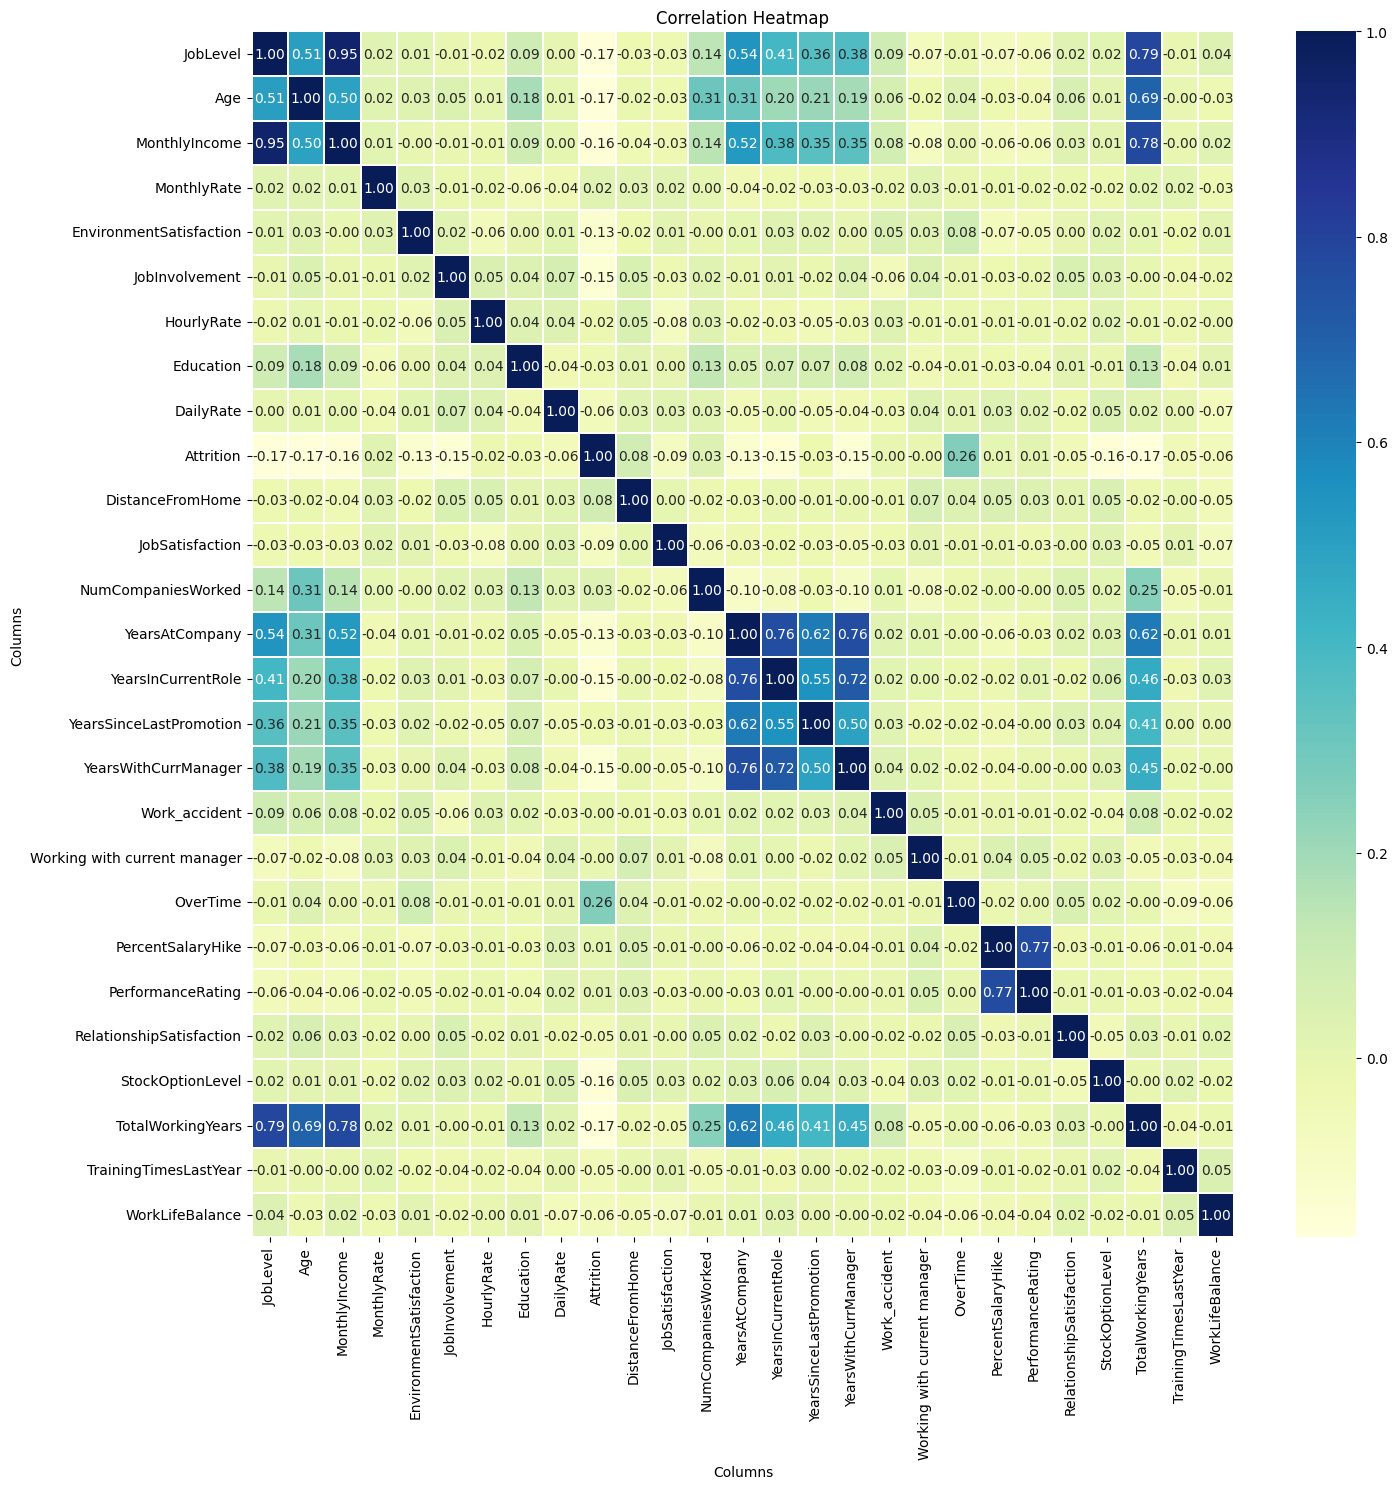

In [ ]:
#lets find the corelation:
# Here, I have drawn a heat map to find the corelation between the columns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.2, ax=ax)
ax.set_xlabel("Columns")
ax.set_ylabel("Columns")
ax.set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
# Insights:
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income


<Axes: xlabel='Age', ylabel='count'>

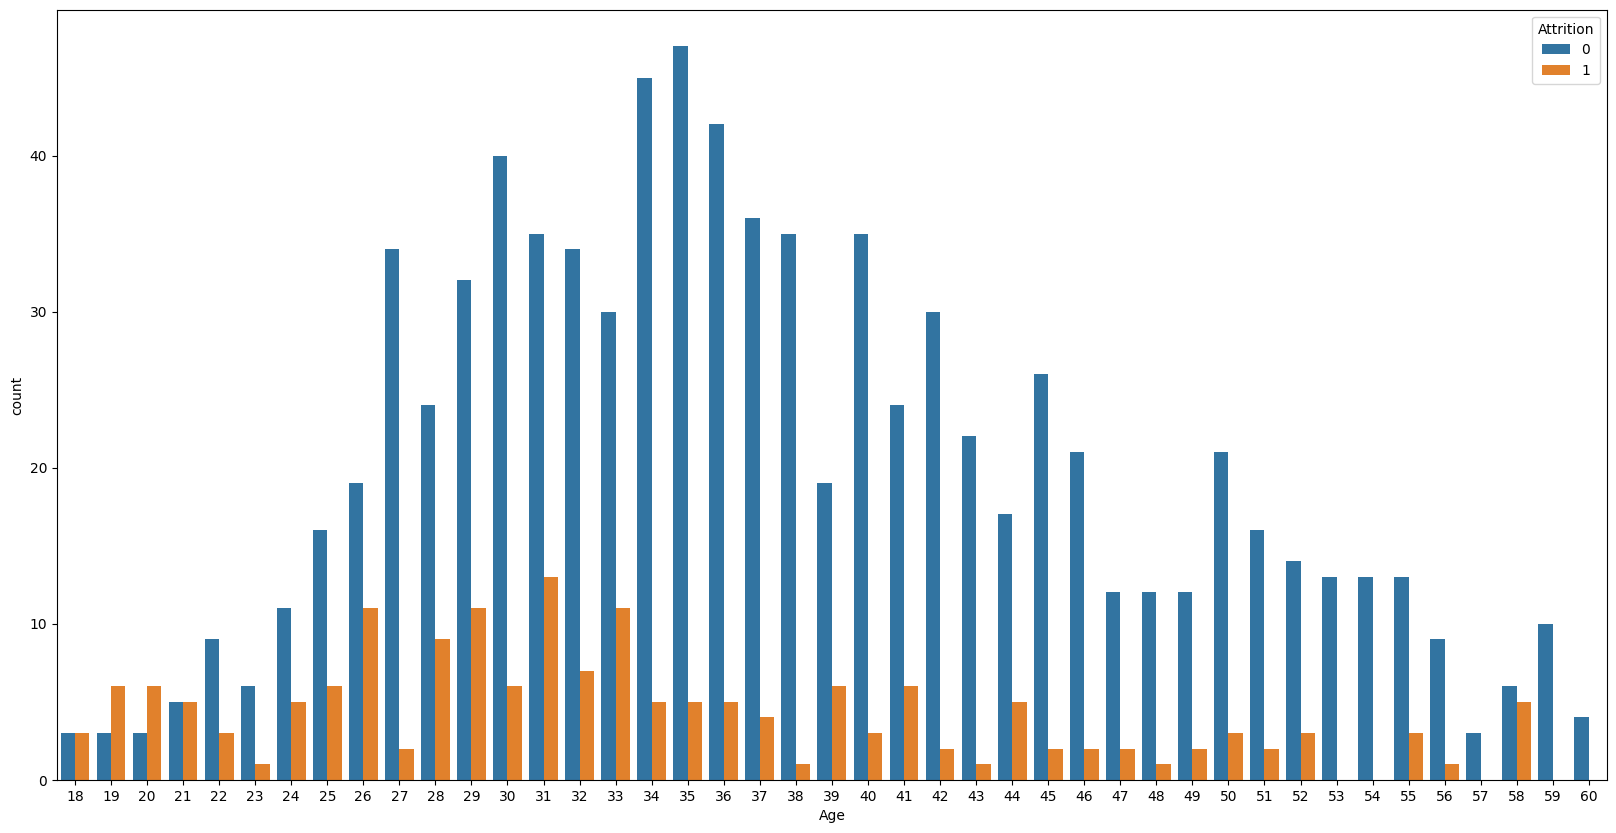

In [ ]:
# lets find if there is any relation between age and
plt.figure (figsize =[20,10])
sns.countplot(x='Age', hue= 'Attrition', data =df)

<Axes: xlabel='JobLevel', ylabel='count'>

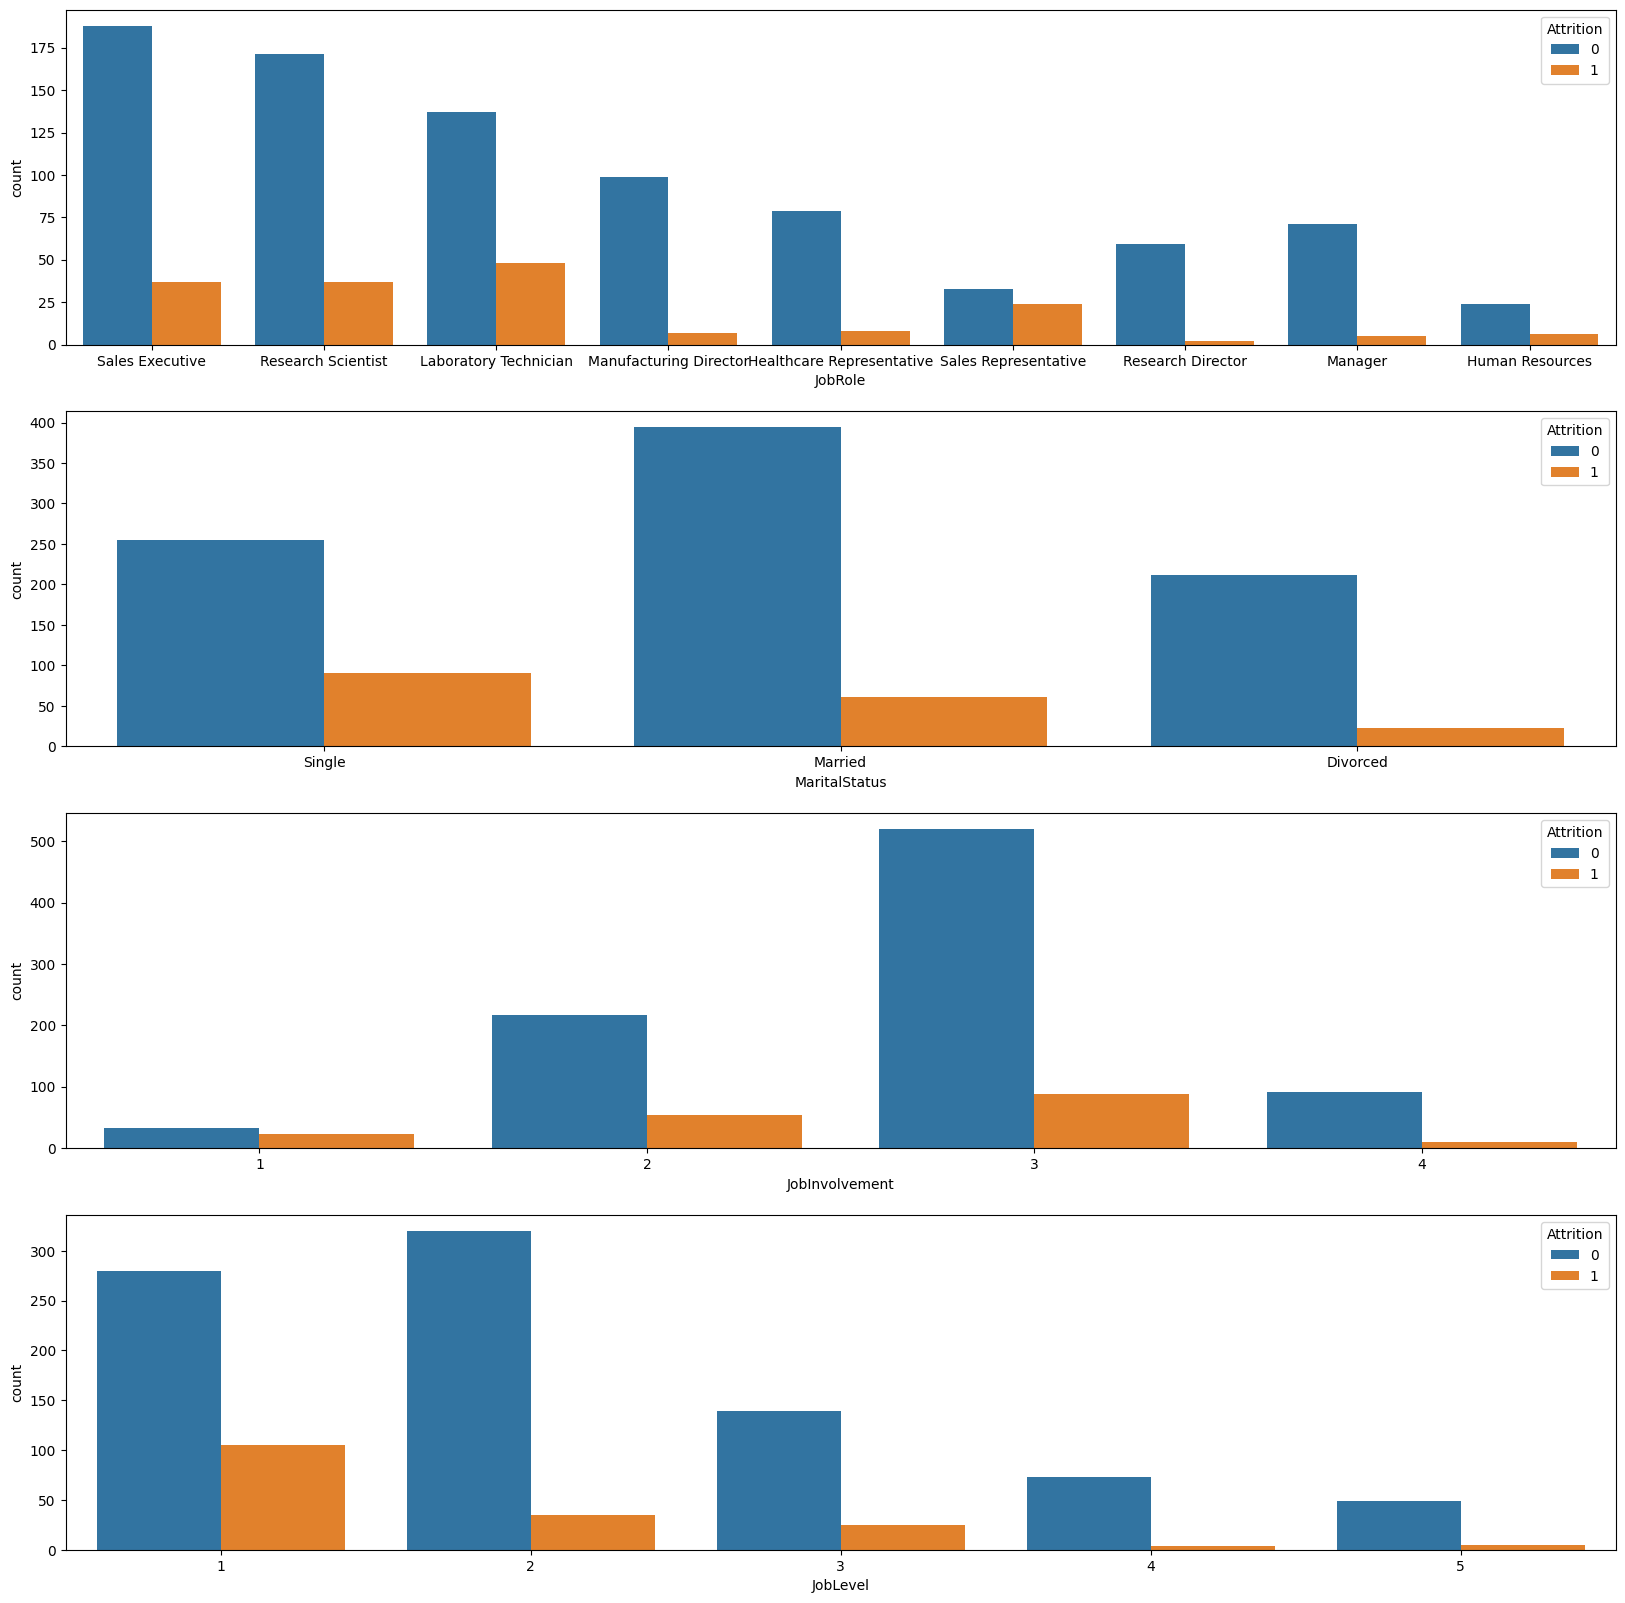

In [ ]:
#Here I have plotted a subplot for [JobRole],[MartialStatus],[JobInvolvment],[JobLevel] VS [Attrition] to find the exact sinario of employ tends to leave on basis of it
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x='JobRole',hue='Attrition',data=df)
plt.subplot(412)
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)
plt.subplot(413)
sns.countplot(x='JobInvolvement',hue='Attrition',data=df)
plt.subplot(414)
sns.countplot(x='JobLevel',hue='Attrition',data=df)

In [ ]:
# Findins:
# Tendency of leaving company showed between 20-31 years old employees, 51- 60 years old employee has less tendency to left.
# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job
# Less involved employees tend to leave the company
# Less experienced (low job level) tend to leave the company

<ipython-input-133-1fae8fb3ac06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_employee_df['DistanceFromHome'],label='Employees Who Left',shade=True,color= 'g')
<ipython-input-133-1fae8fb3ac06>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_employee_df['DistanceFromHome'],label='Employees Who Stayed',shade=True,color='b')


Text(0, 0.5, 'Density')

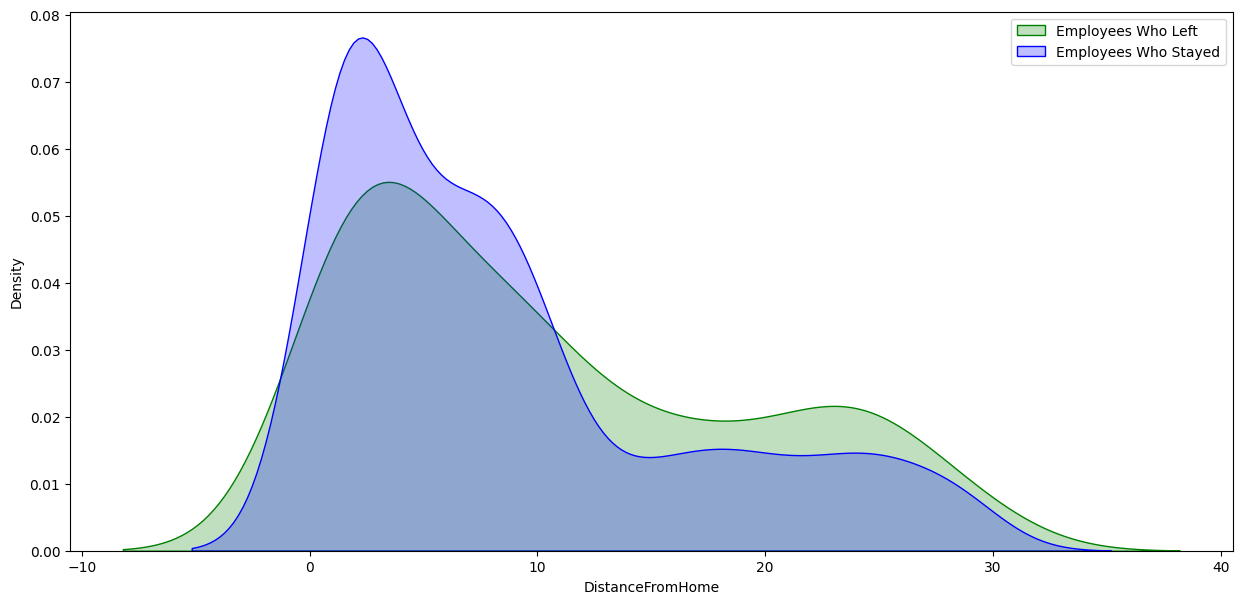

In [ ]:
# Here I want to make a KDE (Kernal Density Estimate) Plot for visualising the Probability of a contineous variable
# IT describes the probable density at different values in a continuous variable.
plt.figure(figsize=[15,7])
sns.kdeplot(left_employee_df['DistanceFromHome'],label='Employees Who Left',shade=True,color= 'g')
sns.kdeplot(stayed_employee_df['DistanceFromHome'],label='Employees Who Stayed',shade=True,color='b')
plt.legend() # to show employee stayed and left in chart
plt.xlabel('DistanceFromHome') # plot x asix title
plt.ylabel('Density') # plot y axis title


<ipython-input-134-b00e317b9f7f>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_employee_df['YearsWithCurrManager'],label='Employees Who Left',shade=True,color= 'g')
<ipython-input-134-b00e317b9f7f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_employee_df['YearsWithCurrManager'],label='Employees Who Stayed',shade=True,color='b')


Text(0, 0.5, 'Density')

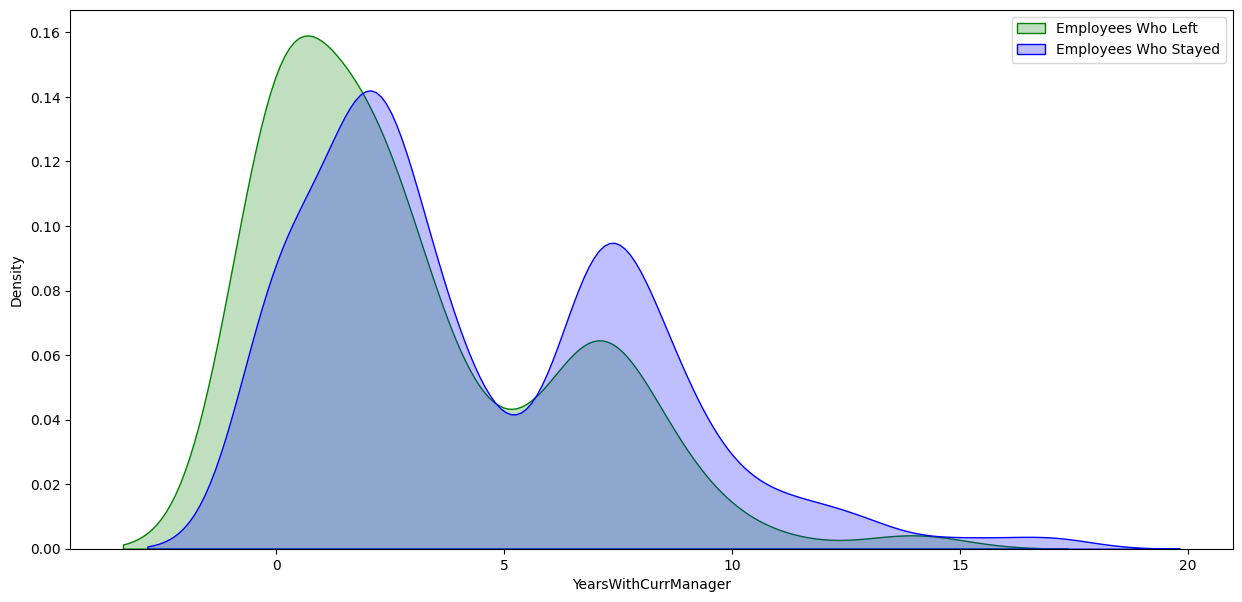

In [ ]:
# Kde Plot for working with current manager
plt.figure(figsize=[15,7])
sns.kdeplot(left_employee_df['YearsWithCurrManager'],label='Employees Who Left',shade=True,color= 'g')
sns.kdeplot(stayed_employee_df['YearsWithCurrManager'],label='Employees Who Stayed',shade=True,color='b')
plt.legend() # to show employee stayed and left in chart
plt.xlabel('YearsWithCurrManager') # plot x asix title
plt.ylabel('Density') # plot y axis title

<ipython-input-135-a3ac9ee60173>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_employee_df['TotalWorkingYears'],label='Employees Who Left',shade=True,color= 'g')
<ipython-input-135-a3ac9ee60173>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_employee_df['TotalWorkingYears'],label='Employees Who Stayed',shade=True,color='b')


Text(0, 0.5, 'Density')

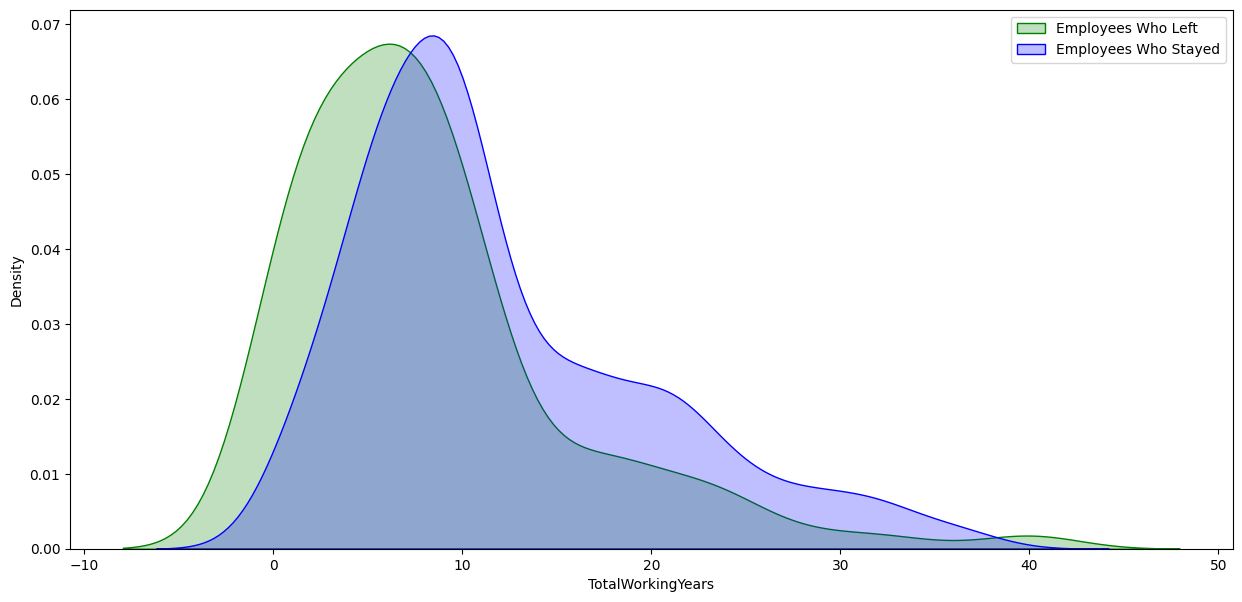

In [ ]:
#Here I want to make a KDE (Kernal Density Estimate) Plot for visualising the Probability of a contineous variable
# IT describes the probable density at different values in a continuous variable.
plt.figure(figsize=[15,7])
sns.kdeplot(left_employee_df['TotalWorkingYears'],label='Employees Who Left',shade=True,color= 'g')
sns.kdeplot(stayed_employee_df['TotalWorkingYears'],label='Employees Who Stayed',shade=True,color='b')
plt.legend() # to show employee stayed and left in chart
plt.xlabel('TotalWorkingYears') # plot x asix title
plt.ylabel('Density') # plot y axis title

In [ ]:
# Findins:
# Distance goes up and employee tends to left.
# employees has less tendency who worked less year with current manager.
# Employees tend to leave more when total working years is less.

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

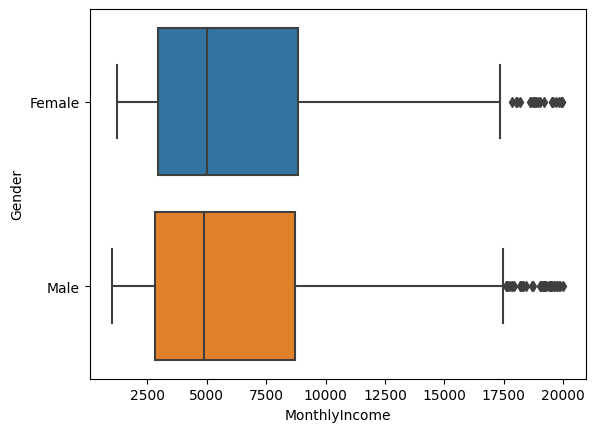

In [ ]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x='MonthlyIncome',y='Gender', data =df)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

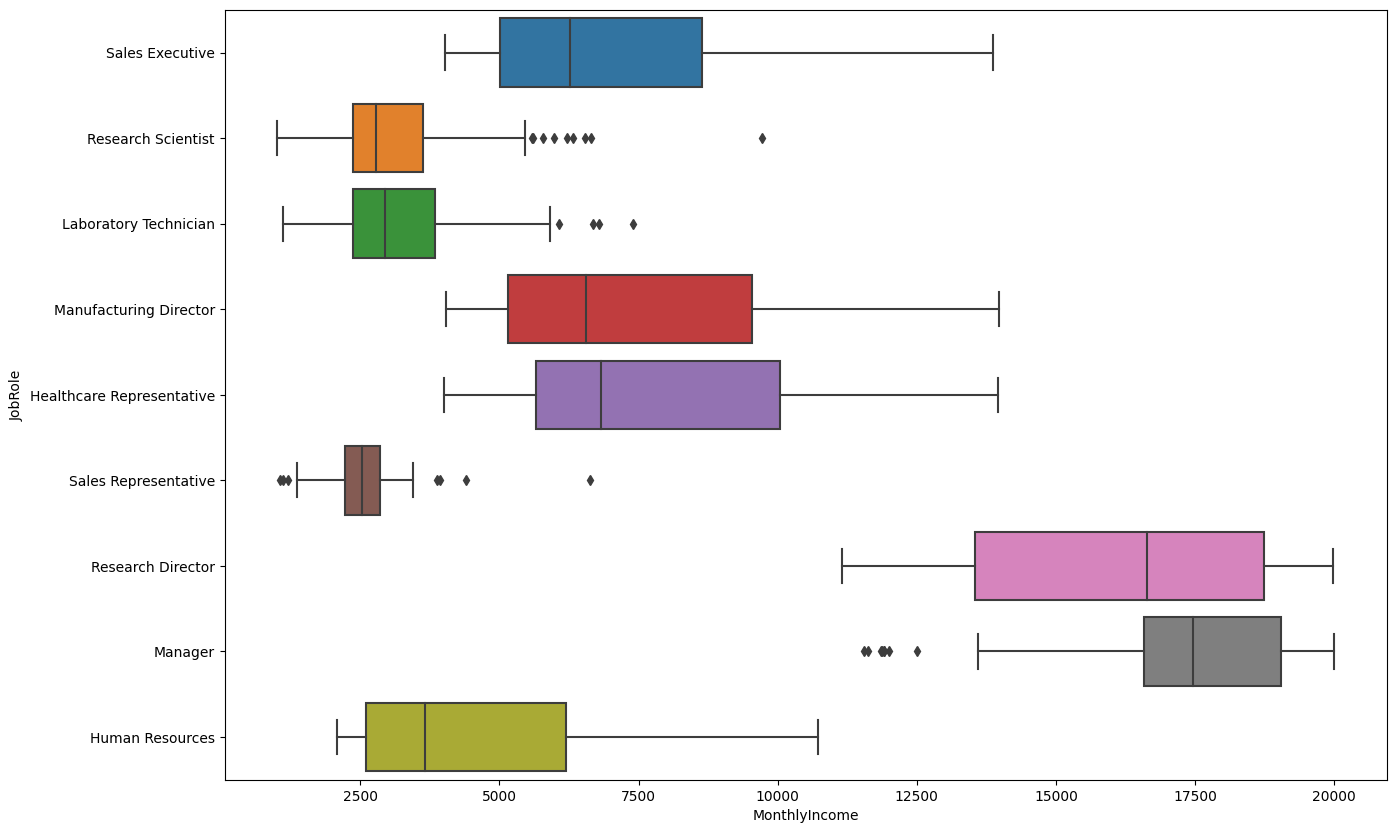

In [ ]:
# Let's see the Gender vs. Monthly Income
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='JobRole',data=df)

In [ ]:
# Findings
# here gender equality for payment is seen .Females are more payed.
# Research Scientists are much less paid than research Directors
# Managers are highly paid.

# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [ ]:
#
df.head(5)

,JobLevel,Age,JobRole,MonthlyIncome,MonthlyRate,EducationField,Gender,EnvironmentSatisfaction,JobInvolvement,HourlyRate,Education,DailyRate,BusinessTravel,Attrition,Department,DistanceFromHome,MaritalStatus,JobSatisfaction,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Work_accident,Working with current manager,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
0,2,41,Sales Executive,5993,19479,Life Sciences,Female,2,3,94,2,1102,Travel_Rarely,1,Sales,1,Single,4,8,6,4,0.0,5.0,0.0,5.0,1,11.0,3.0,1,0,8,0.0,1
1,2,49,Research Scientist,5130,24907,Life Sciences,Male,3,2,61,1,279,Travel_Frequently,0,Research & Development,8,Married,2,1,10,7,1.0,7.0,0.0,10.0,0,23.0,4.0,4,1,10,3.0,3
3,1,33,Research Scientist,2909,23159,Life Sciences,Female,4,3,56,4,1392,Travel_Frequently,0,Research & Development,3,Married,3,1,8,7,3.0,0.0,0.0,5.0,1,11.0,3.0,3,0,8,3.0,3
4,1,27,Laboratory Technician,3468,16632,Medical,Male,1,3,40,1,591,Travel_Rarely,0,Research & Development,2,Married,2,9,2,2,2.0,2.0,0.0,10.0,0,12.0,3.0,4,1,6,3.0,3
5,1,32,Laboratory Technician,3068,11864,Life Sciences,Male,4,3,79,2,1005,Travel_Frequently,0,Research & Development,2,Single,4,0,7,7,3.0,6.0,0.0,6.0,0,13.0,3.0,3,0,8,2.0,2


In [ ]:
#Here I have splited the data set in to catagorical column for m/c learning
x_cat=df[['JobRole','EducationField','Gender','BusinessTravel','Department','MaritalStatus']]

In [ ]:
x_cat

,JobRole,EducationField,Gender,BusinessTravel,Department,MaritalStatus
0,Sales Executive,Life Sciences,Female,Travel_Rarely,Sales,Single
1,Research Scientist,Life Sciences,Male,Travel_Frequently,Research & Development,Married
3,Research Scientist,Life Sciences,Female,Travel_Frequently,Research & Development,Married
4,Laboratory Technician,Medical,Male,Travel_Rarely,Research & Development,Married
5,Laboratory Technician,Life Sciences,Male,Travel_Frequently,Research & Development,Single
...,...,...,...,...,...,...
1041,Sales Executive,Medical,Male,Travel_Rarely,Sales,Single
1042,Laboratory Technician,Life Sciences,Male,Non-Travel,Research & Development,Single
1043,Research Director,Medical,Male,Travel_Rarely,Research & Development,Single
1044,Healthcare Representative,Technical Degree,Male,Travel_Rarely,Research & Development,Married


In [ ]:
from sklearn.preprocessing import OneHotEncoder # OneHotEncoder will help to make a numeric array for categorical data
onehotencoder=OneHotEncoder() #Onehotencoder is variable for OneHotEncoder Method
x_cat =onehotencoder.fit_transform(x_cat).toarray() # converted the x_cat to a numeric array by Onehotencoder.fit_transform(x_cat).toarray() function
x_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
x_cat.shape
x_cat=pd.DataFrame(x_cat) # to save x_cat data frame to a new Pandas dataframe bt pd.DataFrame() method
x_cat # printing the x_cat array as data frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1031,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1032,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
print(df.columns)

Index(['JobLevel', 'Age', 'JobRole', 'MonthlyIncome', 'MonthlyRate',
       'EducationField', 'Gender', 'EnvironmentSatisfaction', 'JobInvolvement',
       'HourlyRate', 'Education', 'DailyRate', 'BusinessTravel', 'Attrition',
       'Department', 'DistanceFromHome', 'MaritalStatus', 'JobSatisfaction',
       'NumCompaniesWorked', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Work_accident',
       'Working with current manager', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance'],
      dtype='object')


In [ ]:
# note that we dropped the target 'Atrittion' because we donot need it any more, our data visualization is done already
x_numerical=df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Working with current manager','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',	'WorkLifeBalance']]
x_numerical
x_numerical=pd.DataFrame(x_numerical) # to save x_cat data frame to a new Pandas dataframe bt pd.DataFrame() method
x_numerical # printing the x_cat array as data frame

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Working with current manager,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
0,41,1102,1,2,2,94,3,2,4,8,6,4,0.0,5.0,5.0,1,11.0,3.0,1,0,8,0.0,1
1,49,279,8,1,3,61,2,2,2,1,10,7,1.0,7.0,10.0,0,23.0,4.0,4,1,10,3.0,3
3,33,1392,3,4,4,56,3,1,3,1,8,7,3.0,0.0,5.0,1,11.0,3.0,3,0,8,3.0,3
4,27,591,2,1,1,40,3,1,2,9,2,2,2.0,2.0,10.0,0,12.0,3.0,4,1,6,3.0,3
5,32,1005,2,2,4,79,3,1,4,0,7,7,3.0,6.0,6.0,0,13.0,3.0,3,0,8,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,28,866,5,3,4,84,3,2,1,0,5,4,1.0,3.0,4.0,0,18.0,3.0,4,0,6,4.0,3
1042,44,981,5,3,3,90,2,1,3,3,5,2,0.0,3.0,4.0,0,14.0,3.0,4,0,7,5.0,3
1043,53,447,2,3,4,39,4,4,2,4,9,8,8.0,8.0,5.0,0,12.0,3.0,2,0,35,2.0,2
1044,49,1495,5,4,1,96,3,2,3,2,3,2,1.0,2.0,8.0,0,14.0,3.0,2,1,20,0.0,2


In [ ]:
# to concatinate the x_cat and y_cat
x_all= pd.concat([x_cat,x_numerical],axis=1)
# I have dropped the whole 1035-1045 rows because after concatinate it was showing NaN values wgich will be proble to  MinMaxScaler
x_dropped_all = x_all.iloc[:-11]
#x_all.drop(x_all.tail(11).index,axis=0) # This can alsobe used but more complex
x_dropped_all
x_dropped_all_new=x_dropped_all.drop(x_dropped_all.index[2]) # to delet the 3rd row which has NaN values
x_dropped_all_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Working with current manager,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,41.0,1102.0,1.0,2.0,2.0,94.0,3.0,2.0,4.0,8.0,6.0,4.0,0.0,5.0,5.0,1.0,11.0,3.0,1.0,0.0,8.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,279.0,8.0,1.0,3.0,61.0,2.0,2.0,2.0,1.0,10.0,7.0,1.0,7.0,10.0,0.0,23.0,4.0,4.0,1.0,10.0,3.0,3.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,33.0,1392.0,3.0,4.0,4.0,56.0,3.0,1.0,3.0,1.0,8.0,7.0,3.0,0.0,5.0,1.0,11.0,3.0,3.0,0.0,8.0,3.0,3.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27.0,591.0,2.0,1.0,1.0,40.0,3.0,1.0,2.0,9.0,2.0,2.0,2.0,2.0,10.0,0.0,12.0,3.0,4.0,1.0,6.0,3.0,3.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,32.0,1005.0,2.0,2.0,4.0,79.0,3.0,1.0,4.0,0.0,7.0,7.0,3.0,6.0,6.0,0.0,13.0,3.0,3.0,0.0,8.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,31.0,326.0,8.0,2.0,1.0,31.0,3.0,3.0,4.0,1.0,13.0,7.0,9.0,9.0,2.0,0.0,18.0,3.0,1.0,1.0,13.0,5.0,3.0
1031,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,46.0,377.0,9.0,3.0,1.0,52.0,3.0,3.0,4.0,4.0,7.0,7.0,4.0,3.0,1.0,0.0,11.0,3.0,1.0,1.0,28.0,1.0,4.0
1032,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,39.0,592.0,2.0,3.0,1.0,54.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,1.0,23.0,4.0,2.0,0.0,11.0,2.0,4.0
1033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,31.0,1445.0,1.0,5.0,3.0,100.0,4.0,3.0,2.0,1.0,10.0,8.0,4.0,7.0,2.0,0.0,11.0,3.0,1.0,0.0,10.0,2.0,3.0


In [ ]:
# MinMax scaler wants columns name to be string type. to solve this issue i applied x_dropped_all_new.columns.astype(str) method.
x_dropped_all_new.columns= x_dropped_all_new.columns.astype(str)

In [ ]:
#To scale all x_cat and x_numerical I used min_max scaler from sklearn so that the data will be treated equally by mc learning model.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # to create the object of scaler
X= scaler.fit_transform(x_dropped_all_new)
X

array([[0.        , 0.        , 0.        , ..., 0.2       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.5       ,
        0.66666667],
       [0.        , 0.        , 1.        , ..., 0.2       , 0.5       ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.        , ..., 0.275     , 0.33333333,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.25      , 0.33333333,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.6       , 0.33333333,
        0.66666667]])

In [ ]:
# 'Attrittion' is the parameter we want to predict so I separated it and also used MinMax scaler to convert
y = df['Attrition']
y

0       1
1       0
3       0
4       0
5       0
       ..
1041    0
1042    0
1043    0
1044    0
1045    0
Name: Attrition, Length: 1035, dtype: int64

In [ ]:
#To make the sample size equal in y
#y1=y.drop(y.index[2]) #this code needed to be run at one time other wise every time it will drom a sample
y1

0       1
1       0
4       0
5       0
6       0
       ..
1041    0
1042    0
1043    0
1044    0
1045    0
Name: Attrition, Length: 1034, dtype: int64

# TASK #5: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
# To perform train_test_split I imported these from sikit learn
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test=train_test_split(X,y1, test_size=0.25) # train size 0.75 and test size 0.25 Dataset splited in to this ratio


In [ ]:
X_train.shape # to see the shape of X_train

(775, 49)

In [ ]:
X_test.shape # to see the shape of X_test

(259, 49)

In [ ]:
y1_train.shape # to see the shape of y1_test

(775,)

In [ ]:
y1_test.shape # to see the shape of y1_test

(259,)

In [ ]:
nan_indices = np.isnan(X_train).any(axis=1) # to find NaN values at the X train, because Logistic regration showed error previously
X_train = X_train[~nan_indices] # removing for NaN values form X_train, y1_Train
y1_train = y1_train[~nan_indices]


In [ ]:
nan_indices = np.isnan(X_test).any(axis=1) # to find NaN values at the X test, because Logistic regration showed error previously
X_test = X_test[~nan_indices] #removing for NaN values form X_train, y1_test
y1_test = y1_test[~nan_indices]

In [ ]:
# Here I am Importing the Logistic regrassion Classifire from SK learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression() # Creating Logisticregression Model
model.fit(X_train, y1_train) # Fitting X_train an y1_train
params = model.get_params() # to get model parameter values
coefficients = model.coef_ # to get model co-efficient
intercept = model.intercept_ # to get model intercept
for param, value in params.items():   # to print all parameter values
    print(f"{param}: {value}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False
Coefficients: [[-0.4675394   0.42340461  1.02636221 -0.74435098 -0.56305771 -0.76189837
   0.53292601 -0.2688827   0.82337393 -0.22545485  0.00585127  0.34639741
  -0.22300761 -0.00189722  0.0984486  -0.0229082   0.0232458  -0.49632783
   0.39437478  0.10229065  0.11837983 -0.3582513   0.24020907 -0.45683759
  -0.19381792  0.65099311  0.58877194  0.15695357 -0.53371803  0.71910939
  -0.16454842 -0.35269292 -0.60321679 -0.66511776 -0.21338946 -0.68212561
   0.19959563 -0.03753368 -0.01738073 -0.23812789  0.05177554  0.01522658
  -0.16019922 -0.07911447 -0.12564948 -0.07268741 -0.57465285  0.71719396
   0.0984488 ]]
Intercept: [-1.44566308]


In [ ]:
y1_pred = model.predict(X_test)
y1_pred  # this is the model is predicting with branch of zeros ans ones,

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Testing Set Performance
from sklearn.metrics import confusion_matrix, classification_report  # to checke what is happening in reality I used confusion metrix and classification report
print('Accuracy {} % '.format(100*accuracy_score(y1_pred,y1_test)))

Accuracy 81.10236220472441 % 


<Axes: >

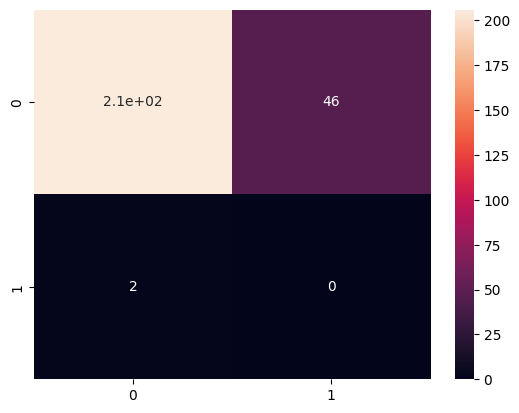

In [ ]:
cm=confusion_matrix(y1_pred,y1_test)    # cm=confusion_matrix() is used to create an object and parameter passed inside ()
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y1_test, y1_pred))  # to print the classification report

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       208
           1       0.00      0.00      0.00        46

    accuracy                           0.81       254
   macro avg       0.41      0.50      0.45       254
weighted avg       0.67      0.81      0.73       254



In [ ]:
#Findings from Logistic Regression Model:
#  It classified around 2500 employees as True positive, 3 employees as True negative , 38 employee as false positive and 2 employee as false negative.
#The model achieve precision of 85% on class 0 and 60% at class 1.
#The model achieve recall of 99% on class 0 and 7% at class 1.
#The model achieves F1 Score of 91% on class 0 and 13% at class 1.



# TASK #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()  # instanciate an object ourside of class RandomForeseClassifire Model
model.fit(X_train, y1_train) # To train the model
# to print model parameters
# Access and print the coefficient/feature importances
print("Feature Importances:")
print(model.feature_importances_)
# Access and print the intercept (not applicable for Random Forest)
print("Intercept:")
print("N/A")
# Access and print the hyperparameters
print("Hyperparameters:")
print("Number of estimators (trees):", model.n_estimators)
print("Maximum depth of each tree:", model.max_depth)
print("Criterion:", model.criterion)
# Access and print other parameters and attributes
print("Random State:", model.random_state)
print("Class Weights:", model.class_weight)
print("Bootstrap:", model.bootstrap)
# Access and print all the parameters
print("Parameters:")
print(model.get_params())
# Access and print all the attributes
print("Attributes:")
print(dir(model))

Feature Importances:
[0.00518609 0.00442476 0.0175366  0.00201311 0.00564976 0.00227495
 0.00795976 0.0075088  0.02233933 0.00098922 0.01115484 0.00704507
 0.00900718 0.00475034 0.00680715 0.00961786 0.0094627  0.00533572
 0.01047575 0.01007348 0.00364649 0.00983769 0.00956661 0.00818313
 0.01075397 0.02379003 0.04936716 0.07625925 0.043624   0.03625782
 0.02365447 0.06323738 0.02156217 0.0194096  0.02549249 0.03147584
 0.0356036  0.03445516 0.02619824 0.03776217 0.04295838 0.01048476
 0.03788792 0.0057827  0.02458326 0.02124355 0.04751573 0.04082466
 0.0189693 ]
Intercept:
N/A
Hyperparameters:
Number of estimators (trees): 100
Maximum depth of each tree: None
Criterion: gini
Random State: None
Class Weights: None
Bootstrap: True
Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'm

In [ ]:
# Testing Set Performance
y1_pred= model.predict(X_test) # model prediction for y1_pred

In [ ]:
y1_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Axes: >

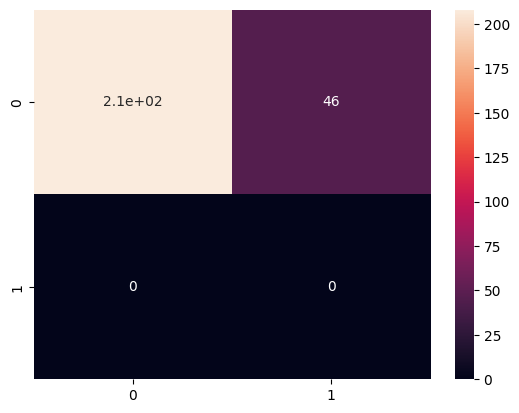

In [ ]:
cm=confusion_matrix(y1_pred,y1_test)    # cm=confusion_matrix() is used to create an object and parameter passed inside ()
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y1_test, y1_pred))  # to print the classification report

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       208
           1       0.00      0.00      0.00        46

    accuracy                           0.82       254
   macro avg       0.41      0.50      0.45       254
weighted avg       0.67      0.82      0.74       254



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# #Findings from Random Forest Model:
#It classified around 2500 employees as True positive, 0 employees as True negative, 41 employee as false positive and 0 employee as false negative.
#The model achieve precision of 84% on class 0 and 0% at class 1.
#The model achieve recall of 100% on class 0 and 0% at class 1.
#The model achieves F1 Score of 91% on class 0 and 0% at class 1.


# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL

In [ ]:
# I am importing Tensorflow for preparing a deep learning model

In [ ]:
import tensorflow as tf # tenseoflow is used to train AI model.
model = tf.keras .models.Sequential() # keras simply an Api that used to build Artificial newral network. It calls tensorflow at back end. Sequencial helps
#To build the models in layer as first layer then the hidden layer and the next hidden layer and so on..
# here I am adding the model by model.add() function, then, started to add layers by tf.keras.layers.Dense(). The Activated function will be 'relu' means
# Rctified delineate units, here unite=500, because i want 500 neurons and input_shape =49 because I want 49 Sample to input.
model.add(tf.keras.layers.Dense(units=500, activation ='relu',input_shape=(49, )))
model.add(tf.keras.layers.Dense(units=500, activation ='relu',input_shape=(49, )))
model.add(tf.keras.layers.Dense(units=500, activation ='relu',input_shape=(49, )))
model.add(tf.keras.layers.Dense(units=1, activation ='sigmoid')) # It is the last layer and i used sigmoied activation function because i want to perform
#classification and this function is saturated either 0 or 1, The output should have only 1 neuron at output and so that, units=1 here.
#

In [ ]:
model.summary() # here i used model.summary() method to see the model summary.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25000     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 526,501
Trainable params: 526,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy']) # optimizer is used to optimize the model.
epochs_hist = model.fit(X_train, y1_train,epochs=100,batch_size=50) # epochs=100 because i want to train it for 100 epochs and sample size =50, so batch_size=50,
#I want to keep the history of model so i used  epoch_hist as variable to plot the history during training

Epoch 1/100
16/16 [==============================] - 1s 12ms/step - loss: 0.4612 - accuracy: 0.8039
Epoch 2/100
16/16 [==============================] - 0s 12ms/step - loss: 0.4120 - accuracy: 0.8377
Epoch 3/100
16/16 [==============================] - 0s 16ms/step - loss: 0.3927 - accuracy: 0.8377
Epoch 4/100
16/16 [==============================] - 0s 29ms/step - loss: 0.3514 - accuracy: 0.8545
Epoch 5/100
16/16 [==============================] - 0s 22ms/step - loss: 0.3170 - accuracy: 0.8714
Epoch 6/100
16/16 [==============================] - 0s 28ms/step - loss: 0.2951 - accuracy: 0.8662
Epoch 7/100
16/16 [==============================] - 0s 27ms/step - loss: 0.2257 - accuracy: 0.9026
Epoch 8/100
16/16 [==============================] - 0s 23ms/step - loss: 0.1739 - accuracy: 0.9260
Epoch 9/100
16/16 [==============================] - 0s 31ms/step - loss: 0.1074 - accuracy: 0.9623
Epoch 10/100
16/16 [==============================] - 0s 25ms/step - loss: 0.0684 - accuracy: 0.9792

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)


In [ ]:
y1_pred = model.predict(X_test)
y1_pred=(y1_pred>0.5) # I want to see that any value in y_pred is greater than 0.5 or mot


8/8 [==============================] - 0s 3ms/step


In [ ]:
y1_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

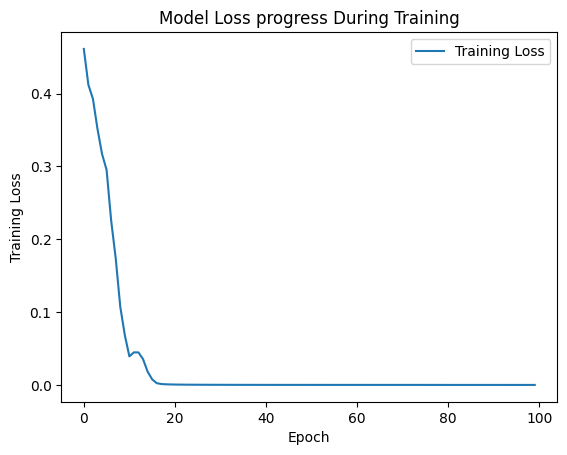

In [ ]:
plt.plot(epochs_hist.history['loss']) # I want to see the loss history from epoch history
plt.title('Model Loss progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

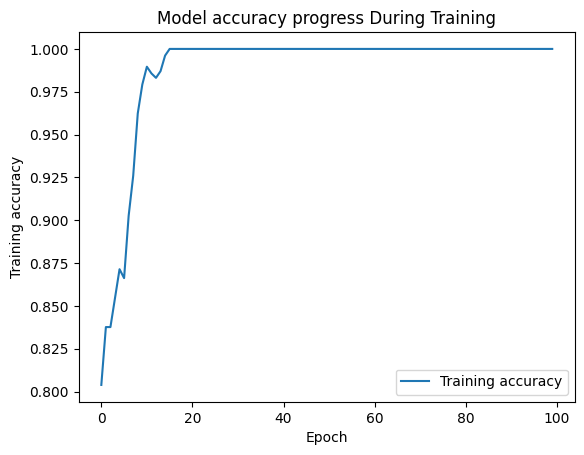

In [ ]:
plt.plot(epochs_hist.history['accuracy']) # I want to see the Accuracy history from epoch history
plt.title('Model accuracy progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])

<Axes: >

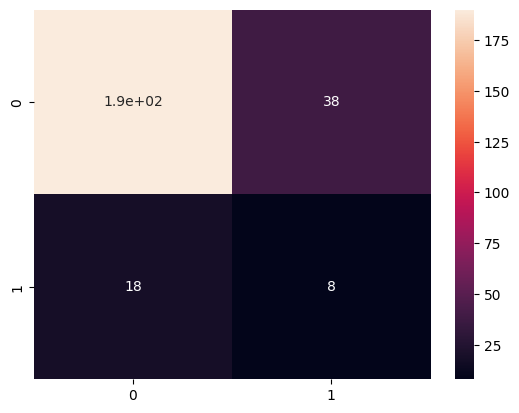

In [ ]:
cm=confusion_matrix(y1_pred,y1_test)    # cm=confusion_matrix() is used to create an object and parameter passed inside ()
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y1_test, y1_pred))  # to print the classification report

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       208
           1       0.31      0.17      0.22        46

    accuracy                           0.78       254
   macro avg       0.57      0.54      0.55       254
weighted avg       0.74      0.78      0.75       254



In [ ]:
# #Findings from Deep Learning Model:
#It classified around 1900-2000 employees as True positive, 7 employees as True negative, 23 employee as false positive and 34 employee as false negative.
#The model achieve precision of 85% on class 0 and 23% at class 1.
#The model achieve recall of 89% on class 0 and 17% at class 1.
#The model achieves F1 Score of 87% on class 0 and 20% at class 1.

In [ ]:
## By Evaluating all method it can be concluded that RANDOM FOREST performend best :)

**Thank you**



